# EDA 및 통계검정
___

In [49]:
# 라이브러리 로드

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy import stats
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest
from scipy.stats import bartlett
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')


# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 차트에 마이너스 출력
plt.rcParams['axes.unicode_minus'] = False

# 지수로 출력되는 값 없애기
pd.options.display.float_format = '{:.5f}'.format

In [50]:
df = pd.read_csv('./datasets/Tabnet_Raw_final.csv')

In [51]:
# 무한값 확인
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
df.dropna(inplace=True)

* 채무부담비율 : 349개
* 거래량회전율 : 1
* 로그시가총액 : 1
* 거래량증가율 : 2
* 시가총액증가율 : 2

In [53]:
# 무한값 제거 후 균형상태 (23 : 1)

df['부실'].value_counts()

0    9716
1     420
Name: 부실, dtype: int64

In [56]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자기자본구성비율', '설비투자효율', '총자본투자효율', '이자보상배율(이자비용)',
       '유동비율', '당좌비율', '부채비율', '총자본정상영업이익률', '매출액정상영업이익률', '매출액순이익률',
       '자기자본순이익률', '매출채권회전률', '재고자산회전률', '총자본회전률', '순운전자본비율', '매출액증가율',
       '총자본증가율', '유동자산증가율', '유형자산증가율', '영업이익증가율', '순이익증가율', 'RETA', 'EBTA',
       'OM', '종업원수증가율', '영업이익변화율', '매출액변화율', '당기순이익변화율', 'DOL', 'DFL',
       'EV/EBITDA', '영업활동으로 인한 현금흐름', '금융비용부담률', '고정비율', 'R&D비율', '채무부담비율',
       '거래량회전율', '로그시가총액', '수정거래량', '거래량증가율', '시가총액증가율', '시가총액', '부실'],
      dtype='object')

In [62]:
df_EDA = df[['자기자본구성비율', '설비투자효율', '총자본투자효율', '이자보상배율(이자비용)',
       '유동비율', '당좌비율', '부채비율', '총자본정상영업이익률', '매출액정상영업이익률', '매출액순이익률',
       '자기자본순이익률', '매출채권회전률', '재고자산회전률', '총자본회전률', '순운전자본비율', '매출액증가율',
       '총자본증가율', '유동자산증가율', '유형자산증가율', '영업이익증가율', '순이익증가율', 'RETA', 'EBTA',
       'OM', '종업원수증가율', '영업이익변화율', '매출액변화율', '당기순이익변화율', 'DOL', 'DFL',
       'EV/EBITDA', '영업활동으로 인한 현금흐름', '금융비용부담률', '고정비율', 'R&D비율', '채무부담비율',
       '거래량회전율', '로그시가총액', '수정거래량', '거래량증가율', '시가총액증가율']]

df_부실 = df[['회사명', '거래소코드', '회계년도', '부실']]

In [66]:
# IQR 활용 이상치 제거 함수(경계값 0.5, 99.5)

def outliers_ipr_side(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [0.5, 99.5]) # np.percentile은 영상의 intensity 중 분위수를 구해주는 함수
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (1.5 * iqr)
    upper_whis = quartile_3 + (1.5 * iqr)
    # print(lower_whis, upper_whis)
    ## 데이터프레임에서 상단 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers[[col]]

In [67]:
# IQR 제거 함수
for i in df_EDA.columns:
    a = outliers_ipr_side(df_EDA, i).index
    df_EDA.drop(a, axis=0, inplace=True)

In [68]:
df_EDA

,자기자본구성비율,설비투자효율,총자본투자효율,이자보상배율(이자비용),유동비율,당좌비율,부채비율,총자본정상영업이익률,매출액정상영업이익률,매출액순이익률,...,영업활동으로 인한 현금흐름,금융비용부담률,고정비율,R&D비율,채무부담비율,거래량회전율,로그시가총액,수정거래량,거래량증가율,시가총액증가율
0,66.05000,89.82000,19.56000,-9.65000,200.97000,165.03000,42.33000,2.37000,3.61000,-8.50000,...,-2560438.00000,1.02190,53.82957,0.13353,54.00749,9.35093,11.53223,52414.64554,2.58032,-0.29814
1,55.32000,1749.87000,1.66000,-15.18000,693.49000,649.98000,21.50000,-9.96000,-25.87000,-40.97000,...,-1572581.00000,3.33969,29.46274,0.73854,90.38005,5.39152,11.83779,34146.60134,-0.12873,1.02096
2,87.63000,71.28000,34.29000,1.92000,694.71000,610.74000,11.23000,1.40000,3.88000,1.45000,...,-3939013.00000,5.55875,22.05243,0.65902,84.69560,1.57831,11.99399,12009.12464,-0.61592,0.43284
3,84.39000,79.30000,31.04000,999999999.00000,324.58000,268.23000,17.79000,0.78000,1.94000,0.69000,...,724893.00000,0.53989,38.43420,0.51217,96.05954,1.53576,11.89931,14531.75685,-0.02696,-0.19587
4,82.80000,144.10000,15.96000,999999999.00000,296.85000,235.21000,18.91000,-4.49000,-9.51000,-13.50000,...,2410205.00000,0.29521,38.07659,3.07637,88.79098,8.02336,12.12779,46607.90467,4.32509,0.69231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,66.62000,0.00000,-14.14000,-41.84000,198.14000,170.80000,46.50000,-11.71000,-29.36000,-54.02000,...,1730494.00000,2.08518,28.94870,3.43788,102.07604,14.19691,12.33596,44026.65010,0.28156,-0.29503
10484,93.08000,21.47000,70.84000,999999999.00000,760.09000,692.05000,7.27000,23.97000,50.94000,40.99000,...,45140519.00000,0.00000,21.47186,3.27320,23.93591,3.00574,12.92397,3.86191,10.66233,1.57402
10485,93.08000,21.47000,70.84000,999999999.00000,760.09000,692.05000,7.27000,23.97000,50.94000,40.99000,...,45140519.00000,0.00000,21.47186,3.27320,23.93591,3.00574,12.92397,3.86191,10.66233,1.57402
10486,9.10000,201.90000,4.52000,-1.83000,34.67000,28.66000,427.21000,-4.55000,-4.99000,-11.48000,...,-33794586.00000,4.28599,673.57697,0.00000,359.31543,3.70685,12.00694,112546.89559,-0.55652,-0.23719


In [69]:
# IQR 불균형 확인 목적 데이터 머지
merged_df = pd.merge(df_EDA, df_부실, left_index=True ,right_index=True, how='inner')

In [72]:
train = merged_df[merged_df['회계년도'] <= 2017]
test = merged_df[merged_df['회계년도'] > 2017]

In [76]:
X_train = train[['자기자본구성비율', '설비투자효율', '총자본투자효율', '이자보상배율(이자비용)', '유동비율', '당좌비율', '부채비율',
       '총자본정상영업이익률', '매출액정상영업이익률', '매출액순이익률', '자기자본순이익률', '매출채권회전률', '재고자산회전률',
       '총자본회전률', '순운전자본비율', '매출액증가율', '총자본증가율', '유동자산증가율', '유형자산증가율',
       '영업이익증가율', '순이익증가율', 'RETA', 'EBTA', 'OM', '종업원수증가율', '영업이익변화율',
       '매출액변화율', '당기순이익변화율', 'DOL', 'DFL', 'EV/EBITDA', '영업활동으로 인한 현금흐름',
       '금융비용부담률', '고정비율', 'R&D비율', '채무부담비율', '거래량회전율', '로그시가총액', '수정거래량',
       '거래량증가율', '시가총액증가율']]

X_test = test[['자기자본구성비율', '설비투자효율', '총자본투자효율', '이자보상배율(이자비용)', '유동비율', '당좌비율', '부채비율',
       '총자본정상영업이익률', '매출액정상영업이익률', '매출액순이익률', '자기자본순이익률', '매출채권회전률', '재고자산회전률',
       '총자본회전률', '순운전자본비율', '매출액증가율', '총자본증가율', '유동자산증가율', '유형자산증가율',
       '영업이익증가율', '순이익증가율', 'RETA', 'EBTA', 'OM', '종업원수증가율', '영업이익변화율',
       '매출액변화율', '당기순이익변화율', 'DOL', 'DFL', 'EV/EBITDA', '영업활동으로 인한 현금흐름',
       '금융비용부담률', '고정비율', 'R&D비율', '채무부담비율', '거래량회전율', '로그시가총액', '수정거래량',
       '거래량증가율', '시가총액증가율']]

y_train = train['부실']

y_test = test['부실']

In [101]:
## Train set 스케일링
# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_train)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train.columns)

In [102]:
## Test set 스케일링
# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_test)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_stan = pd.DataFrame(data = data_scaled_stan, columns=X_test.columns)

In [103]:
# 제대로 분할되었는지 확인
print(X_train_stan.shape, X_test_stan.shape)

(7256, 41) (2502, 41)


In [81]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Bartlett Test 등분산 확인(IQR)

In [104]:
# 등분산성 확인 전 레이블 부착
x_등분산 = pd.concat([X_train_stan, y_train], axis=1)
x_등분산

,자기자본구성비율,설비투자효율,총자본투자효율,이자보상배율(이자비용),유동비율,당좌비율,부채비율,총자본정상영업이익률,매출액정상영업이익률,매출액순이익률,...,금융비용부담률,고정비율,R&D비율,채무부담비율,거래량회전율,로그시가총액,수정거래량,거래량증가율,시가총액증가율,부실
0,0.53777,0.20304,-0.05832,-0.66007,-0.09100,-0.05275,-0.45135,-0.16152,0.05162,-0.36435,...,-0.21969,-0.26739,-0.39811,-0.14432,1.04862,-0.70769,1.82724,0.50374,-0.54348,0
1,-0.00334,16.28357,-0.89979,-0.66007,1.88930,2.11635,-0.66804,-1.82241,-2.09140,-1.79376,...,0.71578,-0.61792,-0.25489,-0.13379,0.32446,-0.08441,1.10365,-0.26288,0.75386,0
2,1.62605,0.02345,0.63412,-0.66007,1.89420,1.94083,-0.77488,-0.29218,0.07125,0.07368,...,1.61140,-0.72452,-0.27371,-0.13544,-0.37297,0.23420,0.22680,-0.40075,0.17544,0
3,1.46266,0.10114,0.48134,1.51499,0.40600,0.40885,-0.70664,-0.37570,-0.06978,0.04022,...,-0.41422,-0.48886,-0.30847,-0.13215,-0.38075,0.04108,0.32672,-0.23408,-0.44291,0
4,1.38248,0.72884,-0.22756,1.51499,0.29451,0.26115,-0.69498,-1.08558,-0.90213,-0.58446,...,-0.51298,-0.49401,0.29855,-0.13425,0.80581,0.50714,1.59724,0.99748,0.43063,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,-0.81173,-0.04300,0.34831,-0.66007,-0.42798,-0.38763,0.48469,0.19814,0.17593,0.21719,...,0.35184,0.02278,-0.13076,-0.10920,0.32730,-0.66555,-0.19484,0.12992,0.02602,0
7252,-1.20105,0.02665,-0.18243,-0.66007,-0.42038,-0.32846,1.25076,0.15638,0.05090,0.11638,...,-0.25864,-0.26278,-0.08251,-0.04900,0.87630,-0.45462,-0.17699,-0.05097,0.01415,0
7253,-1.12541,-0.08378,-0.29384,-0.66007,-0.63690,-0.53425,1.15973,0.52546,0.23336,0.11726,...,0.67234,-0.61474,-0.11914,-0.08785,2.75603,1.20882,0.51958,3.01755,5.19707,0
7254,1.90090,-0.45905,2.35231,1.51499,2.15708,2.30452,-0.81607,2.74807,3.49225,1.81433,...,-0.63213,-0.73287,0.34515,-0.15303,-0.11189,2.13118,-0.24872,2.79083,1.29780,0


In [105]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산

def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['부실']==1][i], x_등분산[x_등분산['부실']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [107]:
# 이분산성 변수
x_hetero = bartlett_test(X_train_stan.columns, H = 1)
x_hetero

,변수,p_value
23,OM,0.00000
6,부채비율,0.00000
9,매출액순이익률,0.00000
2,총자본투자효율,0.00000
10,자기자본순이익률,0.00000
33,고정비율,0.00000
8,매출액정상영업이익률,0.00000
22,EBTA,0.00000
38,수정거래량,0.00000
32,금융비용부담률,0.00000


In [108]:
# 등분산성 변수
x_homo = bartlett_test(X_train_stan.columns, H = 0)
x_homo

,변수,p_value
37,로그시가총액,0.80532


In [109]:
set_이분산 = set(x_hetero["변수"])
set_등분산 = set(x_homo["변수"])
print(len(set_이분산))
print(len(set_등분산))

40
1


## T-test

In [110]:
# 2) t_test
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['부실']==1][i], x_등분산[x_등분산['부실']==0][i], equal_var=True) # 등분산성 : wald t-test
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['부실']==1][i], x_등분산[x_등분산['부실']==0][i], equal_var=False) # 이분산성 : welch’s t-test
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [111]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(X_train_stan.columns, x_homo, x_hetero, p_value=0.05)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 27


,변수,p_value
28,DOL,0.00209
22,EBTA,0.00000
23,OM,0.00000
34,R&D비율,0.00191
21,RETA,0.00000
39,거래량증가율,0.01541
36,거래량회전율,0.00000
33,고정비율,0.00000
32,금융비용부담률,0.00000
5,당좌비율,0.00959


In [112]:
ttest_col = list(x_ttest["변수"])

In [113]:
col_유의 = list(x_ttest["변수"])
X_train_유의 = X_train[col_유의]

## Stepwise

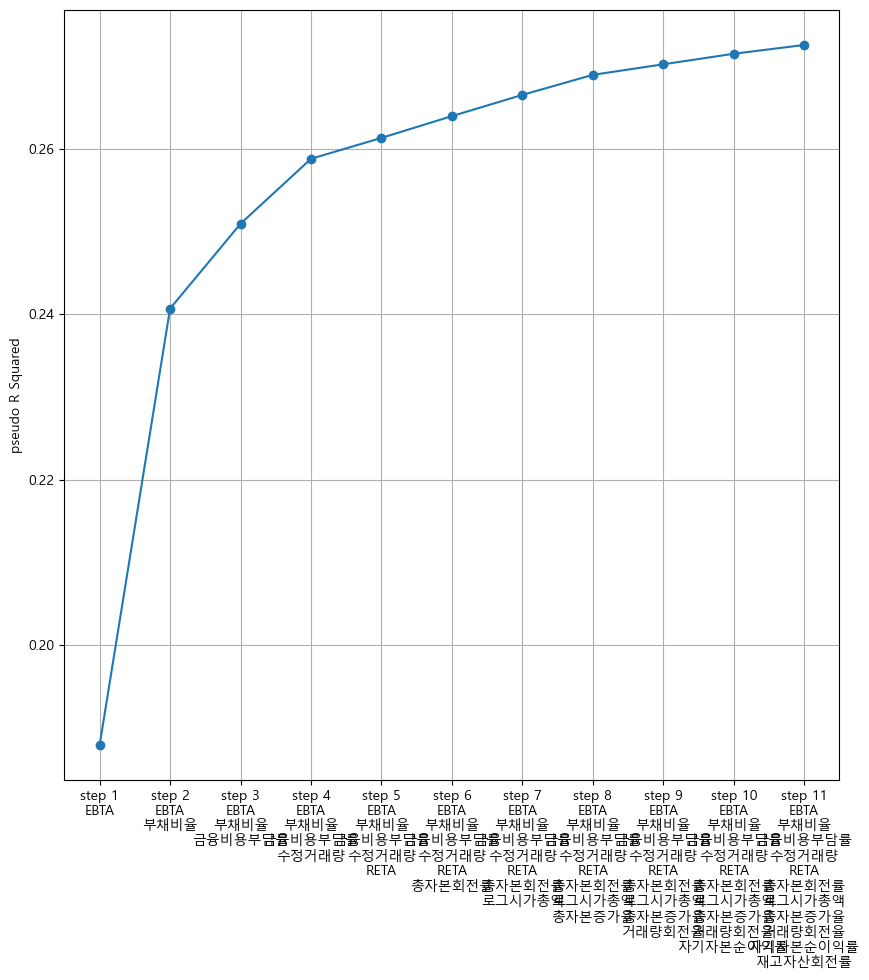

In [114]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.1
    sl_remove = 0.1
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(X_train_stan, y_train, X_train_stan.columns.tolist())

In [115]:
print(len(selected_variables))
selected_variables

11


['EBTA',
 '부채비율',
 '금융비용부담률',
 '수정거래량',
 'RETA',
 '총자본회전률',
 '로그시가총액',
 '총자본증가율',
 '거래량회전율',
 '자기자본순이익률',
 '재고자산회전률']

### 라쏘

In [94]:
# 라쏘 피쳐셀렉에 사용할 최적 파라미터 설정
lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.1, 0.2, 0.5, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid = df_grid.sort_values(by=['rank_test_score'], ascending=True)
df_grid[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.9611


In [133]:
lasso_best = LogisticRegression(C=0.03, penalty='l1', solver='liblinear').fit(X_train_stan, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train_stan.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
6,부채비율,0.30596
7,총자본정상영업이익률,-0.06539
8,매출액정상영업이익률,-0.03122
10,자기자본순이익률,-0.15596
12,재고자산회전률,0.00914
13,총자본회전률,-0.01496
21,RETA,-0.11021
22,EBTA,-0.35228
23,OM,-0.00025
32,금융비용부담률,0.12404


In [134]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 14 개


['부채비율',
 '총자본정상영업이익률',
 '매출액정상영업이익률',
 '자기자본순이익률',
 '재고자산회전률',
 '총자본회전률',
 'RETA',
 'EBTA',
 'OM',
 '금융비용부담률',
 '고정비율',
 '거래량회전율',
 '로그시가총액',
 '수정거래량']

### 중복선정 피쳐

In [135]:
# 각 셀렉션 방법으로 선정된 피쳐들을 리스트로 만든 후 데이터프레임화

list_ttest = list(ttest_col)
list_stepwise = list(selected_variables)
list_lasso = list(lasso_features)
list_col_all = df.columns

In [136]:
# 셀렉션으로 추출된 피쳐리스트에 있으면 1 없으면 0을 반환하는 함수

def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0

def func_stepwise(x):
    if x in list_stepwise:
        return 1
    else:
        return 0

def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

In [137]:
# 위 함수를 활용해 피쳐선정여부를 1 또는 0으로 반환하는 데이터프레임 제작

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['stepwise'] = list_col_all.map(func_stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["ttest"]+feature_counts["stepwise"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 15


,Feature,ttest,stepwise,lasso,total
9,부채비율,1,1,1,3
10,총자본정상영업이익률,1,0,1,2
11,매출액정상영업이익률,1,0,1,2
13,자기자본순이익률,1,1,1,3
15,재고자산회전률,1,1,1,3
16,총자본회전률,1,1,1,3
19,총자본증가율,1,1,0,2
24,RETA,1,1,1,3
25,EBTA,1,1,1,3
26,OM,1,0,1,2


#### IQR 제거 시
* 2개이상중복 선정 : 15개
* 3개이상중복 선정 : 10개

In [138]:
# 2번 이상 중복 선택된 피쳐들의 VIF 공선성 확인

df_fs = X_train_stan[list_feature_final]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,11.27733,EBTA
1,8.44919,총자본정상영업이익률
2,6.86251,매출액정상영업이익률
3,6.61853,OM
4,3.42461,자기자본순이익률
5,2.15225,부채비율
6,1.81076,RETA
7,1.75513,고정비율
8,1.71703,금융비용부담률
9,1.49982,총자본회전률


<AxesSubplot: >

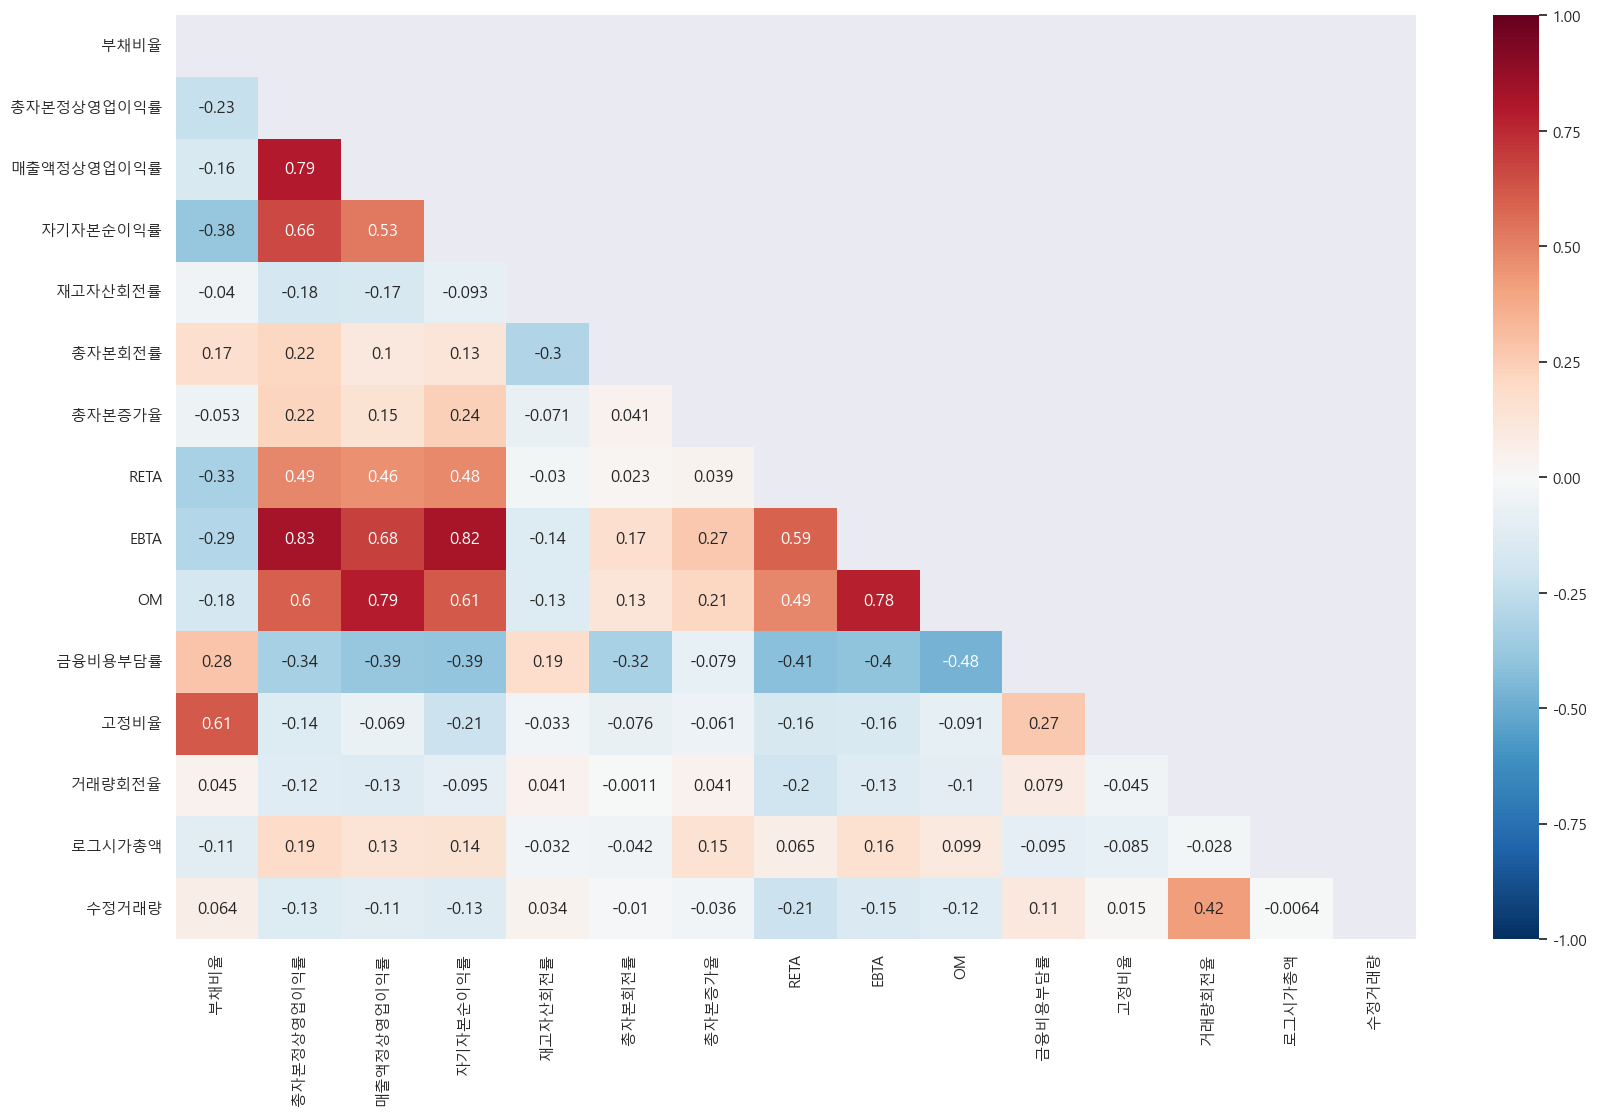

In [139]:
# 2번 이상 중복 선택된 피쳐들의 히트맵 확인

df_fs_cor = df_fs.corr(method='pearson')

sns.set(rc = {'figure.figsize':(20,12)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_fs_cor, xticklabels=df_fs_cor.columns, yticklabels=df_fs_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_fs_cor), vmin=-1, vmax=1)

In [143]:
X_train_stan.to_csv('./datasets/X_train.csv', index=0)
X_test_stan.to_csv('./datasets/X_test.csv', index=0)
y_train.to_csv('./datasets/Y_train.csv', index=0)
y_test.to_csv('./datasets/Y_test.csv', index=0)

### 정상기업과 부실기업의 선정된 피쳐 기초통계량 비교
* '부채비율', '자기자본순이익률', '재고자산회전률', '총자본회전률', 'RETA', 'EBTA', '금융비용부담률', '거래량회전율', '로그시가총액', '수정거래량'

In [162]:
df_분석 = df[['부채비율', '자기자본순이익률', '재고자산회전률', '총자본회전률', 'RETA', 'EBTA', '금융비용부담률', '거래량회전율', '로그시가총액', '수정거래량', '부실']]

In [163]:
df_분석['RETA'] = df_분석['RETA'] * 100
df_분석['EBTA'] = df_분석['EBTA'] * 100
df_분석['금융비용부담률'] = df_분석['금융비용부담률'] * 100
df_분석['거래량회전율'] = df_분석['거래량회전율'] * 100

In [164]:
df_정상 = df_분석[df_분석['부실'] == 0]
df_부실 = df_분석[df_분석['부실'] == 1]

In [165]:
df_정상.drop(columns='부실', inplace=True)
df_부실.drop(columns='부실', inplace=True)

In [167]:
df_정상.describe()

,부채비율,자기자본순이익률,재고자산회전률,총자본회전률,RETA,EBTA,금융비용부담률,거래량회전율,로그시가총액,수정거래량
count,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000,9716.00000
mean,87.78266,1.73803,52.54132,1.12319,23.45735,2.36526,161.12675,364.42232,11.92659,6862.30189
std,532.79295,29.07739,51.90839,0.59421,35.75837,9.65633,544.73051,718.51189,0.48511,36564.74977
min,0.00000,-1224.59000,0.00000,0.02000,-372.29226,-146.26397,0.00000,0.00000,10.00945,0.00000
25%,27.77750,-1.06250,23.05000,0.75000,9.05669,-0.23663,25.93472,81.08190,11.64726,150.53373
50%,57.39000,4.72000,43.36000,1.02000,25.01994,3.07074,83.69052,188.99234,11.94395,619.70097
75%,105.74750,9.95000,69.66000,1.37000,43.41461,6.95662,180.04169,416.53812,12.25455,2661.96882
max,50259.95000,1191.98000,1394.72000,6.36000,493.88612,161.01405,44818.33799,45703.56102,13.01348,1345120.49058


In [168]:
df_부실.describe()

,부채비율,자기자본순이익률,재고자산회전률,총자본회전률,RETA,EBTA,금융비용부담률,거래량회전율,로그시가총액,수정거래량
count,420.00000,420.00000,420.00000,420.00000,420.00000,420.00000,420.00000,420.00000,420.00000,420.00000
mean,306.47864,-72.83086,71.59252,0.91671,-33.62077,-20.68625,539.97560,718.65591,11.75211,28895.19423
std,988.68906,273.96163,90.07808,0.73785,83.79328,38.58365,778.92745,1378.02131,0.49180,96237.99826
min,0.00000,-5300.39000,0.02000,0.04000,-761.81739,-376.91736,0.00000,0.00000,10.10555,0.00000
25%,52.93500,-83.02750,22.17000,0.53000,-44.15805,-26.94161,134.02772,177.90083,11.47043,860.15277
50%,116.00500,-34.66000,47.33000,0.77000,-13.55057,-12.30738,346.37194,409.94790,11.79933,4081.75141
75%,263.60250,-5.01000,81.27500,1.15250,6.80447,-2.29907,623.13871,750.97999,12.05124,20610.85158
max,15340.84000,57.66000,860.79000,9.24000,96.34195,32.72083,6514.08763,20208.36142,12.93204,1329816.21494
